![](http://i67.tinypic.com/2jcbwcw.png)


## Classification BKHW

Author List: 

Sana Iqbal, significant edits for fall 2017

Kevin Li, Ikhlaq Sidhu, Spring 2017

Original Sources: http://scikit-learn.org,http://archive.ics.uci.edu/ml/datasets/Iris
License: Feel free to do whatever you want to with this code


### Our  predictive machine learning models perform two types of tasks:

* __CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.

Eg: We train our model using income and expenditure data of bank customers using  __defaulter or non-defaulter__ as labels. When we input income and expenditure data  of any customer in this model, it will predict whether the customer is going to default or not.

* __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.

Eg: We train our model using income and expenditure data of bank customers using  __ default amount__ as the label. This model when input with income and expenditure data of any customer will be able to predict the default amount the customer might end up with.


* __TO GET STARTED:__:

We will use python library -SCIKIT-LEARN for our classification and regression models.

1. Install numpy, scipy, scikit-learn.

2. Download the dataset provided and save it in your current working directory.

3. In the following sections  you will:

    3.1 Read the dataset into the python program.
    
    3.2 Look  into the dataset characteristics, check for feature type - categorical or numerical.
    
    3.3 Find feature distributions to check sufficiency of data.
    
    3.4 Divide the dataset into training and validation subsets.
    
    3.5 Fit models with training data  using scikit-learn library.
    
    3.6 Calculate training error,this gives you the idea of bias in your model.
    
    3.7 Test model prediction accuracy using validation data,this gives you bias and variance error in the model.
    
    3.8 Report model performance on validation data using different metrics.
    
    3.9 Save the model parameters in a pickle file so that it can be used for test data.
    
  Also, if our data set is small we will have fewer examples for validation.
This will not give us a a good estimatiion of model error.
We can use  k-fold crossvalidation in such situations.
In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set
chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy
of the k iterations





# with a little touch up..

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
'''Example on some pandas features that we are going to use:
# identifying any Null values in our dataframe,
# replacing null values,
# indexing dataframe,
# shuffling

'''
example_df = pd.DataFrame(np.random.randn(5,3),columns=['A','B','C'])
# Make a few areas have NaN (Not a Number) values
example_df.iloc[3:,1] = np.nan
example_df.iloc[2,0] = np.nan
example_df

,A,B,C
0,0.399283,0.291336,-0.304632
1,-0.150893,0.682340,0.498051
2,NaN,-0.414298,-0.552883
3,-0.400650,NaN,-0.973667
4,0.526053,NaN,1.249325


In [3]:
# Check if value in a cell is NAN 
example_df.isnull()

,A,B,C
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,False
4,False,True,False


In [4]:
# Calculate total no of NANs in a column
example_df.isnull().sum()

A    1
B    2
C    0
dtype: int64

In [5]:
# Replace nan with values
example_df0=example_df.fillna(0)
example_df0

,A,B,C
0,0.399283,0.291336,-0.304632
1,-0.150893,0.682340,0.498051
2,0.000000,-0.414298,-0.552883
3,-0.400650,0.000000,-0.973667
4,0.526053,0.000000,1.249325


In [6]:
# Replace nan with values, USE inplace =True ,to change dataframe
example_df1=example_df.fillna(example_df.mean())
example_df1

,A,B,C
0,0.399283,0.291336,-0.304632
1,-0.150893,0.682340,0.498051
2,0.093448,-0.414298,-0.552883
3,-0.400650,0.186459,-0.973667
4,0.526053,0.186459,1.249325


In [7]:
# how to shuffle dataframe values
from sklearn.utils import shuffle
example_df_3= shuffle(example_df).reset_index(drop=True)
example_df_3

,A,B,C
0,-0.400650,NaN,-0.973667
1,-0.150893,0.682340,0.498051
2,0.399283,0.291336,-0.304632
3,NaN,-0.414298,-0.552883
4,0.526053,NaN,1.249325


In [8]:
# bin data values 
import math
bins=[-math.inf,0,math.inf]
labels=['negative','postive']
example_df['label'] = pd.cut(example_df['C'], bins, labels=labels)

In [9]:
example_df

,A,B,C,label
0,0.399283,0.291336,-0.304632,negative
1,-0.150893,0.682340,0.498051,postive
2,NaN,-0.414298,-0.552883,negative
3,-0.400650,NaN,-0.973667,negative
4,0.526053,NaN,1.249325,postive


## CLASSIFICATION

In [10]:

file_path='iris_classification.csv'
data=pd.read_csv(file_path)
data

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
5,5.4,3.9,setosa
6,4.6,3.4,setosa
7,5.0,3.4,setosa
8,4.4,2.9,setosa
9,4.9,3.1,setosa


In [11]:

# SHUFFLE data instances to randomize the distribution of different classes
# Check if data has any NAN  values, you can choose to drop NAN 
# containing rows or replace NAN  values with mean. median,or any assumed value.

data= shuffle(data).reset_index(drop=True)
print('Number of NaNs in the dataframe:\n',data.isnull().sum())
data.head()


Number of NaNs in the dataframe:
 sepal_length    0
sepal_width     0
species         0
dtype: int64


,sepal_length,sepal_width,species
0,5.6,3.0,versicolor
1,5.0,3.0,setosa
2,6.2,2.8,virginica
3,6.8,3.0,virginica
4,6.7,2.5,virginica


In [12]:
# GET FEATURES FROM THE DATA
X=data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width
0,5.6,3.0
1,5.0,3.0
2,6.2,2.8
3,6.8,3.0
4,6.7,2.5


In [13]:
# GET LABELS FROM THE DATA
Y=data['species']
print (Y.value_counts()) #gives the count of each label in the dataset
print (Y.head())

print ("\nWe will map our class labels to integers and then use in modeling.\nThe mapping is:'versicolor': 0, 'virginica': 1,'setosa' :2 \n")

Y=Y.map({'versicolor': 0, 'virginica': 1,'setosa' :2})
print (Y.value_counts()) #gives the count of each label in the dataset

Y.head()


versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64
0    versicolor
1        setosa
2     virginica
3     virginica
4     virginica
Name: species, dtype: object

We will map our class labels to integers and then use in modeling.
The mapping is:'versicolor': 0, 'virginica': 1,'setosa' :2 

2    50
1    50
0    50
Name: species, dtype: int64


0    0
1    2
2    1
3    1
4    1
Name: species, dtype: int64

In [14]:
print("Feature vector shape=", X.shape)
print("Class shape=", Y.shape)


Feature vector shape= (150, 2)
Class shape= (150,)


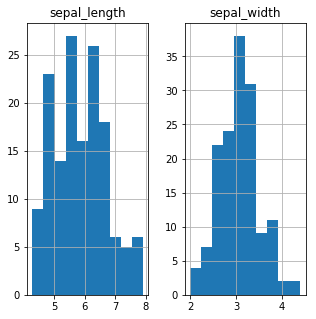

In [15]:
# Get feature distribution of each feature
data.hist(figsize=(5,5))
plt.show()

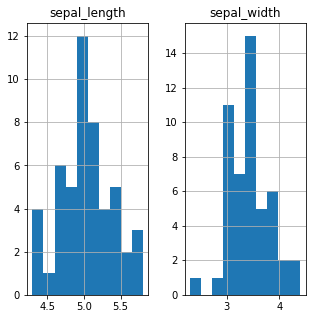

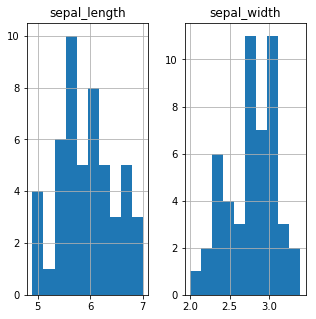

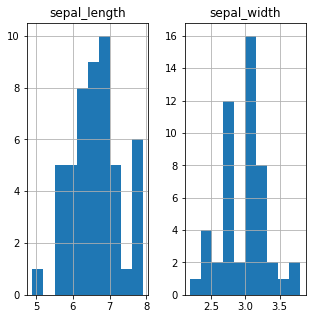

In [17]:
# Check feature distribution of each class, to get an overview of feature and class relationshhip, also useful in validating data
data.groupby('species').hist(figsize=(5,5))
plt.show()

#### USE SKLEARN INBUILT FUNCTION TO BUILD A LOGISTIC REGRESSION MODEL  
For Details check :
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit

In order to check the validity of our trained model, we keep a part of our dataset hidden from the model during training, called  __Validation data__.

Validation data labels are predicted using the trained model and compared with the actual labels of the data.This gives us the idea about how well the model can be trusted for its predictive power.

In [16]:
# Split data into training and validation set  using sklearn function

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))



Number of samples in training data: 120
Number of samples in validation data: 30


In [17]:
from sklearn import linear_model

# Name our regression object
logreg_model = linear_model.LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.

print ('Training a logistic Regression Model..')
logreg_model.fit(x_train, y_train)

Training a logistic Regression Model..


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
# TRAINING ACCURACY

training_accuracy=logreg_model.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)

# OR :


# this line below will predict a category for every row in x_train
Z = logreg_model.predict(x_train) 


# Estimate errors in an array called L
def find_error(Y,Z):
    '''Y:actual_labels
    Z:predicted_labels'''
    
    L = np.arange(len(Y))
    for i,value in enumerate(Y):
        if value == Z[i]: 
            L[i] = 0
        else:
            L[i] = 1

    print ("Y-actual Z-predicted Error \n")
    for i,value in enumerate(Y):
        print (value, Z[i], L[i])
    error_rate=np.average(L)

    print ("\nThe error rate is ", error_rate)
    print ('\nThe accuracy of the model is ',1-error_rate )

    

Training Accuracy: 0.816666666667


In [19]:
find_error(y_train,Z)

Y-actual Z-predicted Error 

2 2 0
2 2 0
2 2 0
0 1 1
2 2 0
0 1 1
2 2 0
2 2 0
2 2 0
2 2 0
0 0 0
0 1 1
1 1 0
2 2 0
2 2 0
1 0 1
2 2 0
1 1 0
2 2 0
2 2 0
2 2 0
1 1 0
1 1 0
2 2 0
2 2 0
0 0 0
0 0 0
1 1 0
0 1 1
1 1 0
2 2 0
2 2 0
2 2 0
0 0 0
1 1 0
0 0 0
0 0 0
2 2 0
2 2 0
0 0 0
2 2 0
0 0 0
0 1 1
1 0 1
1 1 0
0 1 1
0 1 1
2 2 0
1 1 0
1 0 1
1 1 0
2 2 0
0 0 0
0 0 0
1 0 1
0 0 0
2 2 0
1 1 0
1 0 1
0 1 1
1 0 1
2 2 0
1 1 0
2 2 0
1 1 0
1 1 0
0 1 1
1 0 1
1 1 0
1 1 0
1 1 0
1 1 0
0 0 0
2 2 0
1 1 0
0 0 0
0 0 0
1 1 0
2 2 0
2 2 0
0 0 0
2 2 0
2 2 0
0 0 0
1 1 0
0 1 1
1 1 0
1 1 0
1 0 1
0 0 0
2 2 0
0 0 0
1 1 0
2 2 0
2 2 0
0 0 0
2 2 0
1 1 0
1 1 0
1 1 0
2 2 0
0 0 0
1 1 0
0 1 1
1 1 0
1 1 0
0 0 0
0 1 1
1 1 0
1 0 1
2 2 0
2 2 0
2 2 0
2 2 0
0 0 0
2 2 0
2 2 0
0 0 0
0 1 1
0 0 0

The error rate is  0.183333333333

The accuracy of the model is  0.816666666667


In [21]:
# VALIDATION ACCURACY: 
# we will find accuracy of the model 
# using data that was not used for training the model

validation_accuracy=logreg_model.score(x_test,y_test)
print('Accuraacy of the model on unseen validation data: ',validation_accuracy)

from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = logreg_model.predict(x_test)
cf=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Pred 0',1,2],index=['Act 0',1,2])
print ('Confusion matrix of test data is: \n',cf)


Accuraacy of the model on unseen validation data:  0.833333333333
Confusion matrix of test data is: 
        Pred 0  1  2
Act 0       9  4  0
1           1  9  0
2           0  0  7


In [22]:
# PLOT THE DECISION BOUNDARIES:
# 1.create meshgrid of all points between 

#For that we will create a mesh between [x_min, x_max]x[y_min, y_max].
h = 0.02  # step size in the mesh
x_min = X['sepal_length'].min() - .5
x_max =X['sepal_length'].max() + .5
y_min = X['sepal_width'].min() - .5
y_max = X['sepal_width'].max() + .5



# print x_min, x_max, y_min, y_max
xr = np.arange(x_min, x_max, h)
yr = np.arange(y_min, y_max, h)

xx, yy = np.meshgrid(xr, yr)
Z = logreg_model.predict(np.c_[xx.ravel(), yy.ravel()])


# Notes to help read code
# numpy.ravel(a, order='C')  Return a contiguous flattened array. 
#‘C’ means to index the elements in row-major, C-style order, with 
# the last axis index changing fastest, back to the first axis index changing slowest.

# numpy.c_ = <numpy.lib.index_tricks.CClass object at 0x49cad40c>
# Translates slice objects to concatenation along the second axis.
# >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
# provides: array([[1, 2, 3, 0, 0, 4, 5, 6]])

print ('finished Z')

# another approach is to make an array Z2 which has all the predicted values in (xr,yr).  
# This takes longer
Z2 = np.arange(len(xr)*len(yr)).reshape(len(xr),len(yr))
for yni in range(len(yr)):
    for xni in range(len(xr)):
#         print (xni, yni, logreg_model.predict([[xr[xni],yr[yni]]]))

        Z2[xni,yni] =logreg_model.predict([[xr[xni],yr[yni]]])
print ('finished Z2')





finished Z
finished Z2


In [23]:
# try these to better undertand the code above
print (Z.shape)
#print len(xr), len(yr)
#print Z2.shape
#Z2[[1,1]] = 2
print (xni, yni)
#print xx[0,01]
#print yy[0,10]

(39501,)
230 170


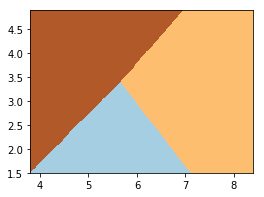

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


# Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()


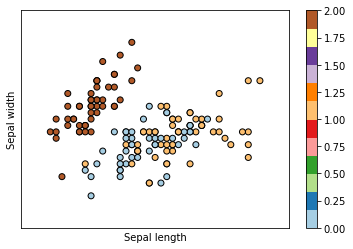

In [25]:
# Plot also the training points
plt.scatter(X['sepal_length'], X['sepal_width'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

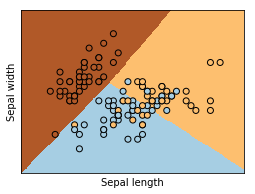

In [27]:
# Put the result into a color plot of decison boundary
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x_train['sepal_length'], x_train['sepal_width'], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


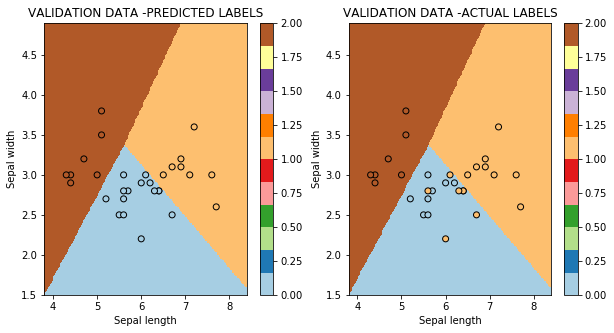

In [28]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))


plt.subplot(1,2,1)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5,5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.colorbar()
# Plot also the training points
plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=logreg_model.predict(x_test), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('VALIDATION DATA -PREDICTED LABELS')




plt.subplot(1,2,2)
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.colorbar()
label=np.unique(y_test)
plt.title('VALIDATION DATA -ACTUAL LABELS')
# Plot also the training points
plt.scatter(x_test['sepal_length'], x_test['sepal_width'], c=y_test,label=np.unique(y_test), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')



plt.show()

## Simple Linear Regression Example

__Linear regression__ is a predictive modeling technique for predicting a numeric response variable based on features.  
"Linear" in the name linear regression refers to the fact that this method fits a model where response bears linear relationship with features. (ie Z is proportional to first power of x)

__Z = X0 + a(X1) + b(X2) +.... where:__   
Z: predicted response  
X0: intercept  
a,b,..: Coefficients of X1,X2..  

If Y is the actual response and Z is the predicted response,    
__Y-Z= Residual__  
Average Residual defines model performance,residual equal to zero represents a perfect fit model.


Coefficients: [ 5.1]
Mean squared error: 3.733867991028302e-27


/Users/sanaiqbal/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


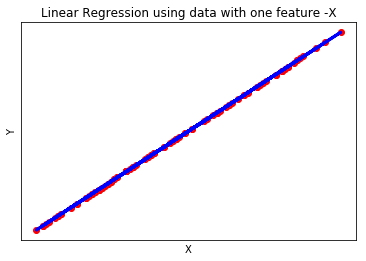

In [29]:
'''Source: Scikit learn
Code source: Jaques Grobler
License: BSD 3 clause'''
from sklearn import linear_model

example_dff = pd.DataFrame(np.random.randint(0,100,size=(100, 1)),columns=['X'])
example_dff['C']=5.1*example_dff['X']
# example_dff['C']=5.1*example_dff['X']**2
X_reg=example_dff[['X']]

Y_reg=example_dff['C']

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_reg, Y_reg)
Z_reg=regr.predict(X_reg)

# The coefficients
print('Coefficients:', regr.coef_)
# The mean squared error
print("Mean squared error:",np.mean((Z_reg - Y_reg) ** 2))

# Plot outputs
plt.scatter(X_reg['X'], Y_reg,  color='red')
plt.plot(X_reg['X'], Z_reg, color='blue',
         linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using data with one feature -X')
plt.xticks(())
plt.yticks(())

plt.show()

# Homework Break Out Section


## Regression and Classification:
__Data Source__:
Datafile is in the working directory by name: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


## Q1:Read the data file in python

## Q.1.2: Describe data features in terms of type, distribution range and mean values.

## Q1.3: Plot feature distributions.This step should give you clues about data sufficiency.

## CLASSIFICATION
### Q 2.1:  Bucket values of 'y1' i.e 'Heating Load'  in the original dataset into 3 classes: 
### 0:'Low' ( < 15),  1:'Medium'  (15-30),    2: 'High'  (>30)   
### This converts the given dataset  into a classification problem, classes being *low, medium and high*.  
### Use this datset for creating a  logistic regression classifiction model for predicting heating load type of a building. Use test-train split ratio of 0.15
### Report training and test accuracies and  confusion matrices.


HINT: Use pandas.cut

### Q2.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization . 
### If we  Scale features in the range [0,1] it is called unity based normalization. Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.
refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

##  REGRESSION
### Q3.1: Train a linear regression model on 85 percent of the given dataset, what is the intercept value and coefficient values.




## Q3.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
###   1. Data that was used for training(Training error)   
###  2. On the 15 percent of unseen data (test error)  




## Q4: Use varying data amounts  from your training data (100,200,300,400,500,all) to train models and report  training error and validation error.Plot error rates vs number of training examples.Do you see any relation.

#### Hint: Shuffle data, convert to arrays, use array indexing 